
## FINANCIAL ECONOMETRICS
MODULE 5 | LESSON 2

---

# **GARCH MODEL**

|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** | Basics of Time Series, ARIMA model, ARCH model  |
|**Keywords** | GARCH(1,1), GARCH(p,q), Engle's ARCH Lagrange Multiplier (LM) Test, Nyblom Stability Test, Sign Bias Test, Adjusted Pearson Goodness-of-Fit Test  |


---

*In the last lesson, we discussed using the ARCH process to model non-constant variances in financial asset returns. We talked about the common features of financial asset returns, especially the existence of time-varying volatility in the data. We introduced the ARCH process to model non-constant variance specifically. We went through the key properties of the ARCH process. In this lesson, we are going to continue our journey of modeling non-constant variance. We are going to expand ARCH(1) model and introduce a general model: GARCH. We will go through the basics of GARCH and apply GARCH to Google stock returns.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
# Download the dataset
m5_data = pd.read_csv("M5. goog_eur_10.csv")

# Convert date variable to date format
m5_data["Date2"] = pd.to_datetime(m5_data["Date"], format="%m/%d/%Y")
goog = m5_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")

goog["GOOGLE_R"] = np.log(goog["GOOGLE"]).diff().dropna()

## **1. GARCH Model**

### **1.1 GARCH(1,1) Model**

GARCH stands for generalized autoregressive conditional heteroskedasticity, and it is an extension of the ARCH model. In the variance function of the ARCH model, a lagged variance term is added to the right of the equation to become a GARCH model. We can formally define GARCH(1,1) as follows:

$$ r_{t} = \sigma_{t} e_{t} $$

Where $e_{t} \sim iid N(0,1)$ and 

$$\sigma^{2}_{t} = \alpha_{0} + \alpha_{1} r^{2}_{t-1} + \beta_{1} \sigma^{2}_{t-1} $$ 

with $\alpha_{0}>0, \ 0 \le \alpha_{1} < 1$ and $0\le \beta_{1} < 1$

The requirements of $\alpha_{0}>0, \ 0 \le \alpha_{1} < 1$ and $0 \le \beta_{1} < 1$ will make sure $r_{t}$ is stationary and the variance is non-negative and finite. 

Structurally, the relationship between GARCH and ARCH models is similar to that between ARMA and AR models. For ARCH(1) model, we can write it as follows:

$$ r_{t} = e_{t} \sqrt{(\alpha_{0} + \alpha_{1} r_{t-1}^{2})} $$

In the above ARCH(1) model, we see we use $r_{t-1}$ to predict $r_{t}$. This concept is the same as for AR(1) model, so we sometimes call this term the AR part of the ARCH model.

Similarly, let's write a GARCH(1,1) model in the following form:

$$ r_{t} = e_{t} \sqrt{(\alpha_{0} + \alpha_{1} r_{t-1}^{2} + \beta_{1} \sigma_{t-1}^{2})} $$

In the GARCH(1,1) formula, we not only have $r_{t-1}$ to predict $r_{t}$ but also have $\sigma_{t-1}$ to predict $r_{t}$. The reason why GARCH(1,1) is like ARMA(1,1) is because we have $r_{t-1}$ like AR part and $\sigma_{t-1}$ like MA part for GARCH. 

So why do we need the GARCH model? Even though the ARCH model seems to be able to cover all the features of asset returns, it usually requires many parameters to properly model the asset return. In order to tackle this issue, the GARCH model was developed so that there is no need to include too many terms in a model.


### **1.2 Properties of GARCH(1,1) Model**

Most of the properties for the GARCH(1,1) model are similar to the ARCH(1,1) model. In this section, we will highlight the key properties for GARCH(1,1).


#### **1.2.1 $r_{t}$ is Conditionally Normally Distributed**

The above statement follows the same proof as we describe in ARCH(1) model. We can summarize it in the following formula:

$$ r_{t}|r_{t-1} \sim N \big(0,\alpha_{0} + \alpha_{1} r_{t-1}^{2} + \beta_{1} \sigma_{t-1}^{2} \big) $$


#### **1.2.2 $r_{t}^{2}$ is An ARMA(1,1) Process**

We know that GARCH(1,1) is defined as follows:

$$r_{t} = \sigma_{t} e_{t}  \tag{1} $$ and 

$$ \sigma^{2}_{t} = \alpha_{0} + \alpha_{1} r^{2}_{t-1} + \beta_{1} \sigma^{2}_{t-1}  \tag{2} $$

If we subtract the equation (1) and equation (2), we can get the following new equation:

$$ r_{t}^{2}=\alpha_{0}+\alpha_{1}r_{t-1}^{2}+\beta_{1}\sigma_{t-1}^{2}+\nu_{t} $$ 

where $\nu_{t}  =\sigma_{t}^{2} (e_{t}^{2} - 1)$ and $\nu_{t}$ is white noise.

Since $\nu_{t-1} = \sigma_{t-1}^{2} (e_{t-1}^{2} - 1)$ and $r_{t-1}^{2} = \sigma_{t-1}^{2} e_{t-1}^{2}$, we can get $\sigma_{t-1}^{2} = r_{t-1}^{2}-\nu_{t-1}$. Plug this last result into the new equation from the subtraction of two equations from the definition, we can get the following equation:

$$ r_{t}^{2} = \alpha_{0} + (\alpha_{1} + \beta_{1}) r_{t-1}^{2} + \nu_{t} - \beta_{1} \nu_{t-1} $$

The above equation is an ARMA(1,1) with the squared asset return as the AR part and white noise as the MA part. To ensure stationarity, $0 < \alpha_{1}+\beta_{1} < 1$.

#### **1.2.3 $r_{t}$ is White Noise**

Using the same calculation from the ARCH model, we can show that GARCH(1,1) is white noise. We can write unconditional $r_{t}$ distribution as follows:

$$ r_{t} \sim \text{white noise} \Big(0, \frac{\alpha_{0}}{1 - (\alpha_{1} + \beta_{1})} \Big) $$ 

where $0 < \alpha_{1} + \beta_{1} < 1$

This shows similar results as the ARCH(1) model. $r_{t}$ is unconditionally homoscedastic when $\alpha_{1} + \beta_{1} < 1$. So when $r_{t}$ is stationary $(0 \le \alpha_{1} < 1)$, $\ r_{t}$ is conditionally heteroskedastic but unconditionally homoscedastic. Also, even though we use asset return as an example for GARCH(1,1) here, it was originally applied to the squared error term from a time series regression model. 


#### **1.2.4 GARCH(1,1) Has Infinite Memory**

By iterating the variance equation from GARCH(1,1), we can write the equation as follows:

$$ \begin{align*}
  \sigma_{t^{2}} &= \alpha_{0} + \alpha_{1} r_{t-1}^{2} + \beta_{1} \sigma_{t-1}^{2} \\
  &= \alpha_{0} + \alpha_{1} r_{t-1}^{2} + \beta_{1} (\alpha_{0} + \alpha_1 r_{t-2}^2 + \beta_{1} \sigma_{t-2}^{2})  \\
  &= \alpha_{0} + \alpha_{0} \beta_{1} + \alpha_{1} r_{t-1}^{2} + \alpha_{1} \beta_{1} r_{t-2}^{2} + \beta_{1}^{2} (\alpha_{0} + \alpha_{1} r_{t-3}^{2} + \beta_{1} \sigma_{t-3}^{2})  \\
  &= \alpha_{0} (1 + \beta_{1} + \beta_{1}^{2} + \beta_{1}^{3} + \cdots ) + \alpha_{1} \sum_{i=1}^{\infty} \beta_{1}^{i-1} r_{t-i}^{2}  
\end{align*} $$

We can see that $\sigma_{t^{2}}$ can be expanded as the infinite sum of past asset returns. This means that all the past asset returns still have influence on today's conditional variance. Alternatively, we can say GARCH(1,1) has infinite memory. All the coefficients should decay in order to maintain stationarity of the GARCH(1,1) process. Because of this feature, the GARCH model is usually better to model time series data than the ARCH(1) model. 


### **1.3 GARCH($p, q$) Model**

As with other time series models we have talked about so far, we can easily extend GARCH(1,1) model to GARCH($p,q$) model. 

We can define GARCH($p,q$) as follows:

$$ r_{t} = \sigma_{t} e_{t} $$

where $e_{t} \sim iid N(0,1)$  and the variance equation is:

$$ \sigma^{2}_{t} = \alpha_{0} + \alpha_{1} r^{2}_{t-1} + \alpha_{2} r_{t-2}^{2} + \cdots + \alpha_{p} r_{t-p}^{2} + \beta_{1} \sigma^{2}_{t-1} + \beta_{2} \sigma^{2}_{t-2} + \cdots + \beta_{q} \sigma^{2}_{t-q} $$

where $\alpha_{0}>0, \ \alpha_{i} \ge 0$ for $i = 1, \cdots, p$ and $\beta_{j} \ge 0$ for $j = 1, \cdots, q$

We can now rewrite the variance equation with a backshift operator as follows:

$$ \sigma^{2}_{t} = \alpha_{0} + \alpha(B) r_{t}^{2} + \beta(B) \sigma^{2}_{t} $$

Where

$$ \alpha(B) = \alpha_{1} B + \alpha_{2} B^{2} + \cdots + \alpha_{p} B^{p} $$ 

and

$$ \beta(B) = \beta_{1} B + \beta_{2} B^{2} + \cdots + \beta_{q}B^{q} $$

For the above characteristic equations, the absolute values of the roots of $B$ must be greater than $1$ to ensure that $r_{t}$ is stationary.
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

## **2. Model Diagnostics**

There are a number of tests that are usually used to check for ARCH and GARCH models. We will cover some of them in this section.


### **2.1 Ljung-Box Test**

We introduced this test in last module. The Ljung-Box test is used to see if there is serial correlation in a time series. We use this test if there is an overall correlation in the residuals or squared residuals from a time series model, including ARCH and GARCH models. The null hypothesis ($H_0$) is there is no serial correlation in the time series. Hence, if the $p$-value $< 0.05$, we will reject the null hypothesis, and the time series has a serial correlation issue.


### **2.2 Information Criteria**

In the last module, we also introduced Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These are the metrics used to evaluate overall model specifications. The lower the numbers of AIC and/or BIC, the better the model specifications. There are other information criteria, but we usually focus on AIC or BIC. 


### **2.3 Log Likelihood Number**

We also use the log likelihood number to evaluate the goodness-of-fit of a model if it is fitted with the maximum likelihood method. The lower the log likelihood number, the better the model fit.


### **2.4 Engle's ARCH Lagrange Multiplier (LM) Test**

Engle's ARCH LM test, or Engle's ARCH test, determines if there is a serial correlation (autocorrelation) issue in the squared residuals of a time series model. The null hypothesis ($H_0$) is that there is no serial correlation in the squared residuals.


### **2.5 Nyblom Stability Test**

This is the test to check if there is a regime change for the time series over time. The test checks if there is any structural change among variables or if coefficients are stable with no variation overtime. The null hypothesis ($H_0$) is that there is no regime change and the variances for coefficients are $0$.


### **2.6 Sign Bias Test**

This is the test to check if shocks not modeled by the model have an impact on volatilities. The sign bias test is used to determine the impact of large and small shocks on volatility. The negative sign bias test is to check if negative shocks not modeled by the model have an impact on volatility. The positive sign bias test is to check if positive shocks not modeled by the model have an impact on volatility. The null hypothesis ($H_0$) is that there is no impact from shocks not modeled by the model. 


### **2.7 Adjusted Pearson Goodness-of-Fit Test**

This test compares the empirical distribution of standard residuals with the selected theoretical distribution. It is a chi-squared test. The null hypothesis ($H_0$) is that the empirical distribution of the standard residuals is equal to theoretical distribution.


## **3. GARCH Application: Google Stock Return**

In this section, we are going to use Google stock return data from 2016 to 2021 to run a GARCH model. We'll start by looking into the data first before building the model.


### **3.1 Data Exploration**

**Figure 1: Google Stock Returns from 2016 to 2021**


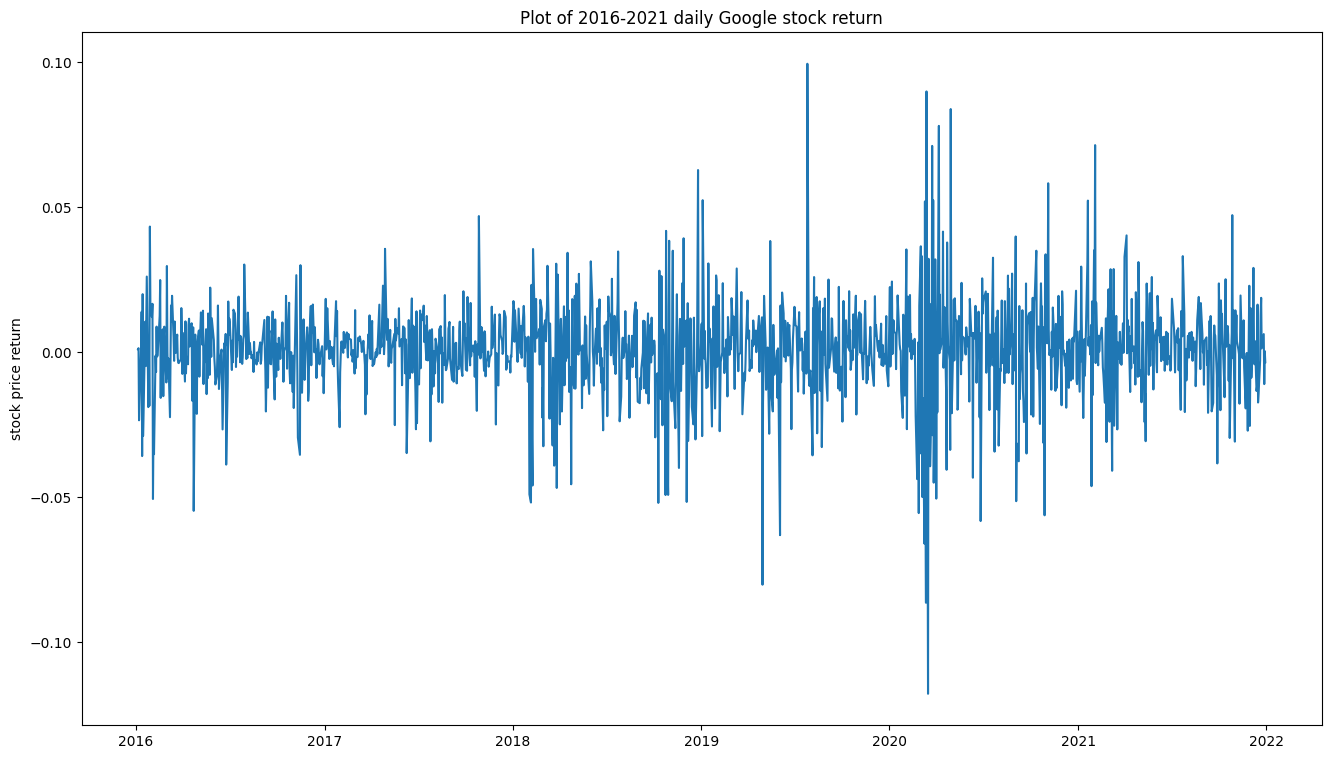

In [3]:
# Google Stock Returns from 2016 to 2021
plt.plot(goog.GOOGLE_R)
plt.ylabel("stock price return")
plt.title("Plot of 2016-2021 daily Google stock return")
plt.show()

In figure 1, we can see Google stock returns are oscillating around $0$. We can see there are periods of time when the volatilities of returns are higher than other times. This pattern of volatility in Google stock return data is the phenomenon that the GARCH model tries to capture.


**Figure 2: Histogram of Google Stock Returns**


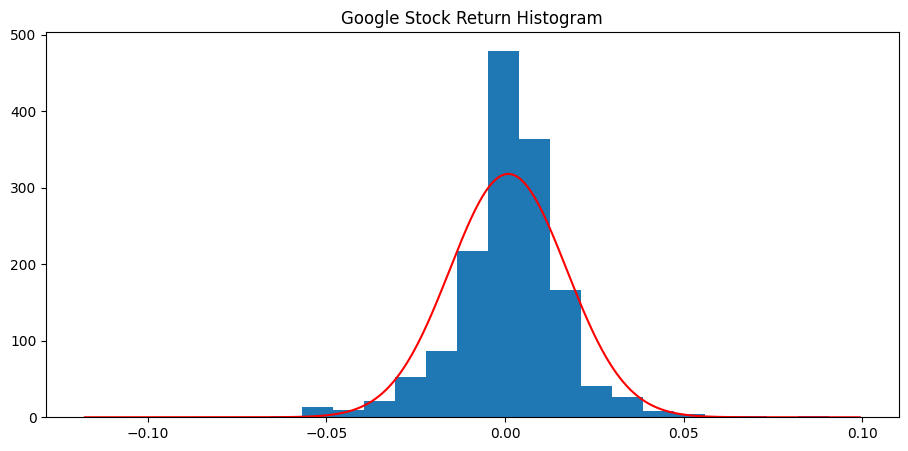

In [4]:
# Histogram Histogram of Google Stock Returns
plt.figure(figsize=(11, 5))
goog_r = goog.GOOGLE_R.dropna()

x = np.linspace(min(goog_r), max(goog_r), len(goog_r))
values, bins, _ = plt.hist(goog_r, bins=25)  # Histogram

(mu, sigma) = stats.norm.fit(goog_r)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * sum(values * np.diff(bins)), "r")  # Density

plt.title("Google Stock Return Histogram")
plt.show()

Figure 2 shows the histogram of Google's stock returns and a normal distribution curve overlaid on it. We can see Google's stock return distribution has a higher peak and fatter tail than normal distribution.


**Figure 3: Normal QQ Plot for Google Stock Returns**


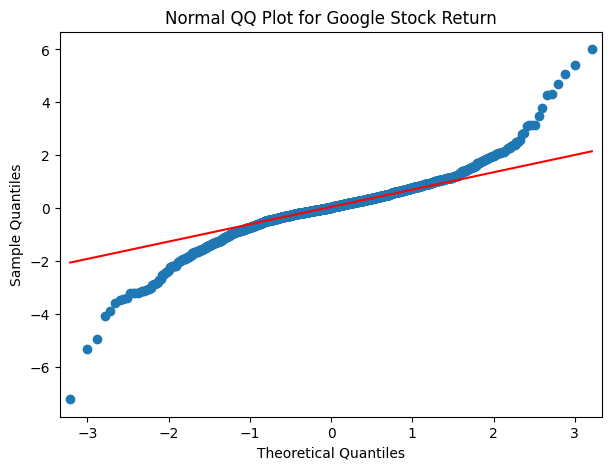

In [5]:
# Normal QQ Plot for Google Stock Returns
qq = sm.qqplot(goog_r, stats.norm, fit=True, line="q")
qq.set_size_inches((7, 5))
plt.title("Normal QQ Plot for Google Stock Return")
plt.show()

In figure 3, we can clearly see that Google stock returns have a fat-tailed distribution compared to normal distribution.


**Figure 4: Google Stock Squared Returns from 2016 to 2021**


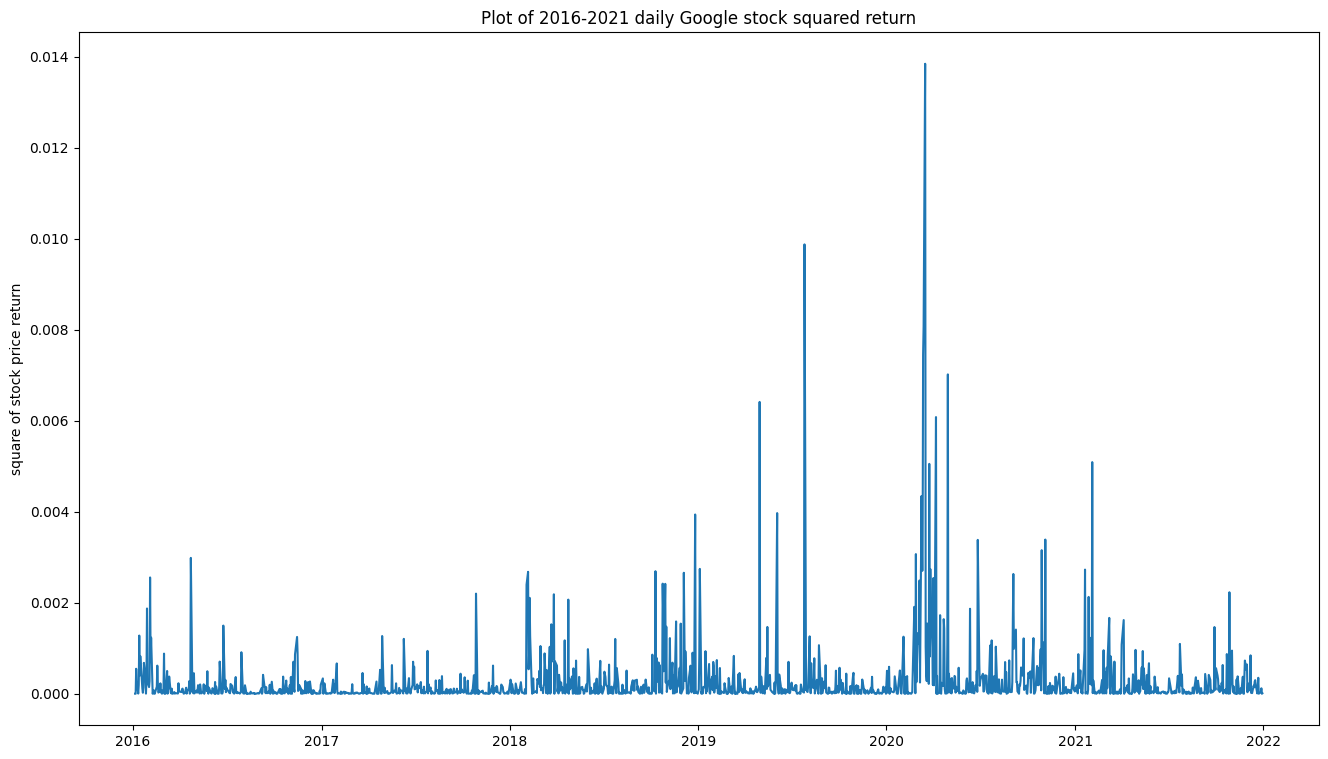

In [6]:
# Google Stock Squared Returns
plt.plot(goog.GOOGLE_R**2)
plt.ylabel("square of stock price return")
plt.title("Plot of 2016-2021 daily Google stock squared return")
plt.show()

From figure 4, we can see there are serial correlations to the squared return for Google stock. The high returns are usually followed by more volatilities.


**Figure 5: ACF and PACF Plots for Google Stock Returns and Squared Returns**


/usr/local/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


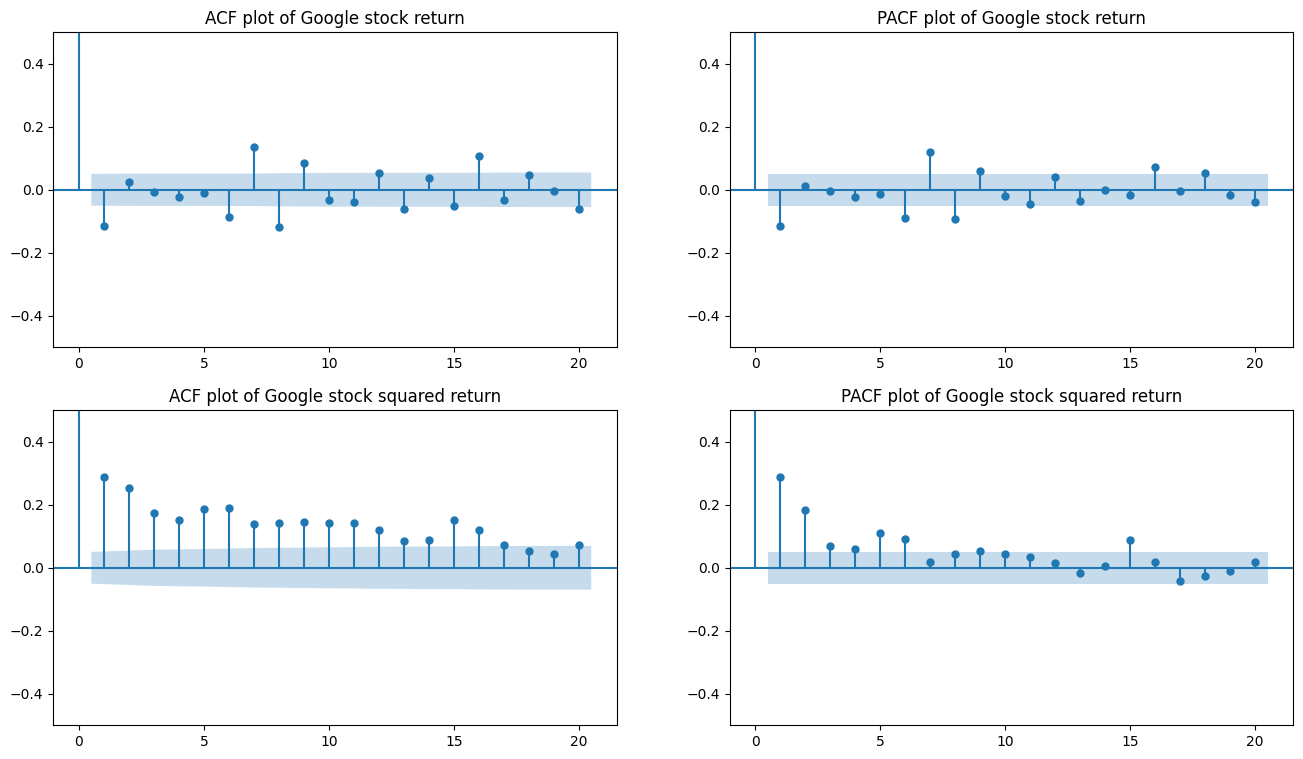

In [7]:
# ACF and PACF Plots for Google Stock Returns and Squared Returns
fig, ax = plt.subplots(2, 2)

sm.graphics.tsa.plot_acf(goog.GOOGLE_R.dropna(), lags=20, ax=ax[0, 0])
ax[0, 0].set(title="ACF plot of Google stock return")
ax[0, 0].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(goog.GOOGLE_R.dropna(), lags=20, ax=ax[0, 1])
ax[0, 1].set(title="PACF plot of Google stock return")
ax[0, 1].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_acf(goog.GOOGLE_R.dropna() ** 2, lags=20, ax=ax[1, 0])
ax[1, 0].set(title="ACF plot of Google stock squared return")
ax[1, 0].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(goog.GOOGLE_R.dropna() ** 2, lags=20, ax=ax[1, 1])
ax[1, 1].set(title="PACF plot of Google stock squared return")
ax[1, 1].set_ylim([-0.5, 0.5])
plt.show()

In figure 5, ACF and PACF plots for Google stock returns and squared returns all show patterns like the ARMA model. Hence, we can start with the GARCH(1,1) model for model specifications.


### **3.2 Model Estimation and Diagnostics**

Let's start with the GARCH(1,1) model using Google stock return data. Figure 6 shows the GARCH(1,1) model result.

**Figure 6: GARCH(1,1) Model with Normal White Noise**


In [8]:
# GARCH(1,1) Model with Normal White Noise
garch11_spec = arch_model(
    goog.GOOGLE_R.dropna(),
    vol="GARCH",
    p=1,
    q=1,
    mean="AR",
    dist="Normal",
    rescale=True,
)
garch11_fit = garch11_spec.fit()
garch11_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 47997386384.17197
Iteration:      2,   Func. Count:     14,   Neg. LLF: 199292769186.64432
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2905.730300574438
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2886.924838807617
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2728.1623014795196
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2727.977772388159
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2727.9469065210833
Iteration:      8,   Func. Count:     53,   Neg. LLF: 2727.939344863278
Iteration:      9,   Func. Count:     58,   Neg. LLF: 2727.937888262674
Iteration:     10,   Func. Count:     63,   Neg. LLF: 2727.9370770019887
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2727.9370674845277
Iteration:     12,   Func. Count:     72,   Neg. LLF: 2727.9370674843412
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2727.9370674845277
            Iteration

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:               GOOGLE_R   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2727.94
Distribution:                  Normal   AIC:                           5463.87
Method:            Maximum Likelihood   BIC:                           5485.14
                                        No. Observations:                 1504
Date:                Fri, Sep 12 2025   Df Residuals:                     1503
Time:                        18:40:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1114  4.019e-02      2.772  5.578e-03 [3.262e-02,  0.190]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1250  9.366e-02      1.335      0.182 [-5.858e-02,  0.309]
alpha[1]       0.0822  3.786e-02      2.170  2.999e-02  [7.960e-03,  0.156]
beta[1]        0.8671  6.959e-02     12.461  1.223e-35    [  0.731,  1.004]
===========================================================================

Covariance estimator: robust
"""

In [9]:
# Diagnostic tests for GARCH(1,1) Model with Normal White Noise
print("GARCH(1,1) Model with Normal White Noise\n")

# Ljung-Box test and the Box-Pierce test
print("Ljung-Box and Box-Pierce tests on stanrdized residuals")
print(acorr_ljungbox(garch11_fit.std_resid, boxpierce=True))

print("\nLjung-Box and Box-Pierce tests on stanrdized squared residuals")
print(acorr_ljungbox(garch11_fit.std_resid**2, boxpierce=True))

# ARCH LM test for conditional heteroskedasticity
print("\nARCH LM test for conditional heteroskedasticity")
print(garch11_fit.arch_lm_test(standardized=True))

GARCH(1,1) Model with Normal White Noise

Ljung-Box and Box-Pierce tests on stanrdized residuals
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.453025   0.500902   0.452122   0.501329
2    0.576445   0.749595   0.575215   0.750056
3    1.467876   0.689704   1.463686   0.690677
4    2.000287   0.735706   1.993976   0.736867
5    6.544690   0.256763   6.517257   0.259087
6    7.905635   0.245099   7.870972   0.247710
7   13.250117   0.066244  13.183515   0.067761
8   17.537745   0.024972  17.442672   0.025816
9   17.725621   0.038494  17.629176   0.039728
10  18.162461   0.052284  18.062535   0.053918

Ljung-Box and Box-Pierce tests on stanrdized squared residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.006413   0.936170  0.006401   0.936234
2   0.101005   0.950752  0.100741   0.950877
3   0.103420   0.991424  0.103148   0.991457
4   0.115280   0.998401  0.114961   0.998410
5   0.636968   0.986248  0.634224   0.986383
6   0.641445   0.995669  0.638677   0.995720
7   1.6

Figure 6 shows the GARCH(1,1) model with normal white noise. Everything looks good from the model results except that we can see one of the coefficient estimates is not significant. Now let's look on some diagnostic plots. 


**Figure 7: Model Diagnostic Plots for the GARCH(1,1) Model with Normal White Noise**


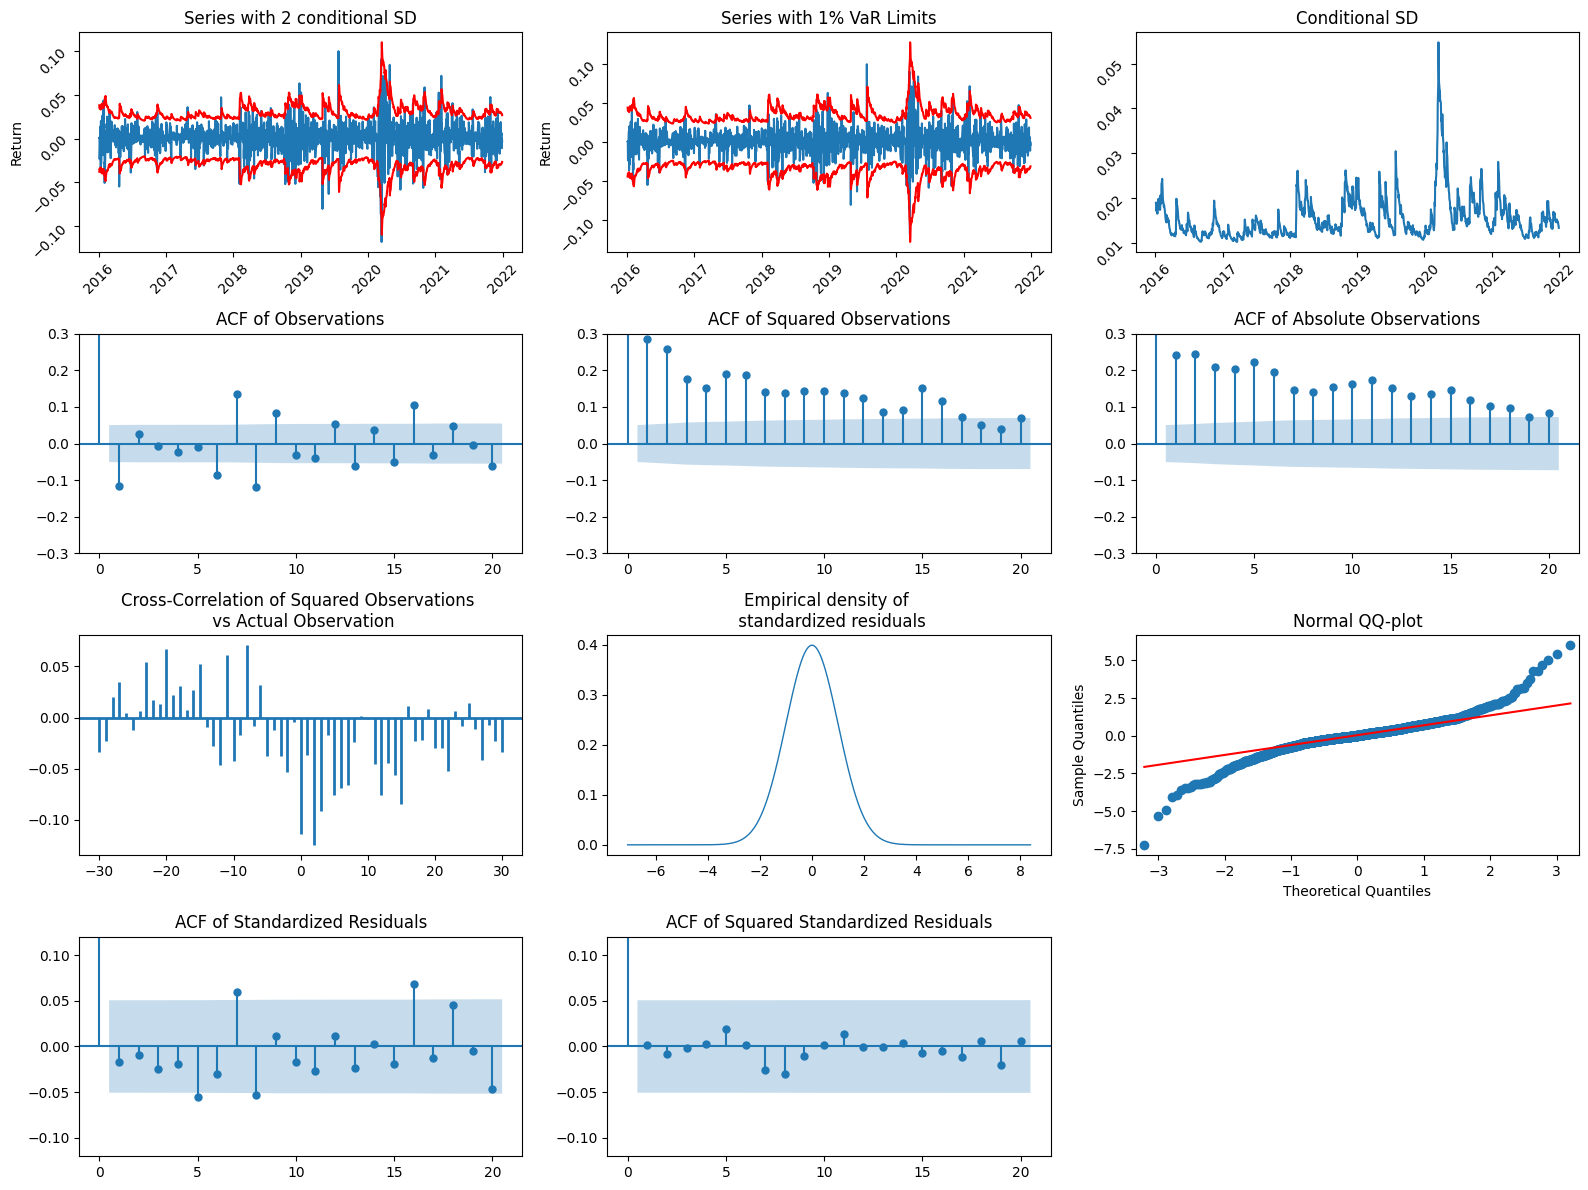

In [10]:
# Model Diagnostic Plots for the GARCH(1,1) Model with Normal White Noise
fig, ax = plt.subplots(4, 3, figsize=(16, 12))

# Figure Row 1 Column 1
ax[0, 0].plot(goog.GOOGLE_R)
ax[0, 0].plot(2.0 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].plot(-2.0 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("Series with 2 conditional SD")
ax[0, 0].set_ylabel("Return")

# Figure Row 1 Column 2
VaR_1 = stats.norm.ppf(0.99)
ax[0, 1].plot(goog.GOOGLE_R)
ax[0, 1].plot(VaR_1 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].plot(-VaR_1 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("Series with 1% VaR Limits")
ax[0, 1].set_ylabel("Return")

# Figure Row 1 Column 3
ax[0, 2].plot(garch11_fit.conditional_volatility / 100.0)
ax[0, 2].set_title("Conditional SD")
ax[0, 2].tick_params(labelrotation=45)

# Figure Row 2 Column 1
sm.graphics.tsa.plot_acf(garch11_fit.resid / 100.0, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("ACF of Observations")
ax[1, 0].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 2
sm.graphics.tsa.plot_acf(garch11_fit.resid**2, lags=20, ax=ax[1, 1])
ax[1, 1].set_title("ACF of Squared Observations")
ax[1, 1].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 3
sm.graphics.tsa.plot_acf(np.abs(garch11_fit.resid), lags=20, ax=ax[1, 2])
ax[1, 2].set_title("ACF of Absolute Observations")
ax[1, 2].set_ylim([-0.3, 0.3])

# Figure Row 3 Column 1
ax[2, 0].xcorr(
    garch11_fit.resid**2,
    garch11_fit.resid,
    usevlines=True,
    maxlags=30,
    normed=True,
    lw=2,
)
ax[2, 0].set_title("Cross-Correlation of Squared Observations \n vs Actual Observation")

# Figure Row 3 Column 2
standaraized_residuals = garch11_fit.std_resid
min_val = np.min(standaraized_residuals)
max_val = np.max(standaraized_residuals)
empirical_density = np.linspace(min_val, max_val, len(standaraized_residuals))
ax[2, 1].plot(empirical_density, stats.norm.pdf(empirical_density), lw=1)
ax[2, 1].set_title("Empirical density of \n standardized residuals")

# Figure Row 3 Column 3
sm.qqplot(garch11_fit.resid, stats.norm, fit=True, line="q", ax=ax[2, 2])
ax[2, 2].set_title("Normal QQ-plot")

# Figure Row 4 Column 1
sm.graphics.tsa.plot_acf(garch11_fit.std_resid, lags=20, ax=ax[3, 0])
ax[3, 0].set_title("ACF of Standardized Residuals")
ax[3, 0].set_ylim([-0.12, 0.12])

# Figure Row 4 Column 2
sm.graphics.tsa.plot_acf((garch11_fit.std_resid) ** 2, lags=20, ax=ax[3, 1])
ax[3, 1].set_title("ACF of Squared Standardized Residuals")
ax[3, 1].set_ylim([-0.12, 0.12])

ax[3, 2].axis("off")
fig.tight_layout()
plt.show()

From figure 7, we can see that normal QQ plot for residuals is still showing fat-tailed distribution. With this piece of information, let's try a GARCH(1,1) model with Student's t-distribution to see if we can improve the model.


**Figure 8: GARCH(1,1) Model with Student's t White Noise**


In [11]:
# GARCH(1,1) Model with Student's t White Noise
garch11_t_spec = arch_model(
    goog.GOOGLE_R.dropna(),
    vol="GARCH",
    p=1,
    q=1,
    mean="AR",
    dist="StudentsT",  # power=2.0,
    rescale=True,
)
garch11_t_fit = garch11_t_spec.fit()
garch11_t_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 44460.09922944116
Iteration:      2,   Func. Count:     16,   Neg. LLF: 26834.21818317633
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4643.085336014008
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3989.0183228191504
Iteration:      5,   Func. Count:     41,   Neg. LLF: 3675.460875363791
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2649.490724849872
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2766.8467193787974
Iteration:      8,   Func. Count:     62,   Neg. LLF: 2605.903844429963
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2605.6128715996083
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2605.0821170950417
Iteration:     11,   Func. Count:     81,   Neg. LLF: 2604.950995832247
Iteration:     12,   Func. Count:     87,   Neg. LLF: 2604.8863698909486
Iteration:     13,   Func. Count:     93,   Neg. LLF: 2604.8534888525414
Iteration:     14,   Func. Count:     99,   Neg. LLF: 2604

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                     GOOGLE_R   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2604.84
Distribution:      Standardized Student's t   AIC:                           5219.69
Method:                  Maximum Likelihood   BIC:                           5246.27
                                              No. Observations:                 1504
Date:                      Fri, Sep 12 2025   Df Residuals:                     1503
Time:                              18:41:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1487  2.799e-02      5.313  1.081e-07 [9.383e-02,  0.204]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0616  2.976e-02      2.071  3.838e-02 [3.297e-03,  0.120]
alpha[1]       0.1039  2.528e-02      4.111  3.943e-05 [5.438e-02,  0.153]
beta[1]        0.8865  2.642e-02     33.552 8.404e-247   [  0.835,  0.938]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.6441      0.364     10.013  1.338e-23 [  2.931,  4.357]
========================================================================

Covariance estimator: robust
"""

In [12]:
# Diagnostic tests for GARCH(1,1) Model with Student's t White Noise
print("GARCH(1,1) Model with StudentsT White Noise\n")

# Ljung-Box test and the Box-Pierce test
print("Ljung-Box and Box-Pierce tests on standardized residuals")
print(acorr_ljungbox(garch11_t_fit.std_resid, boxpierce=True))

print("\nLjung-Box and Box-Pierce tests on standardized squared residuals")
print(acorr_ljungbox(garch11_t_fit.std_resid**2, boxpierce=True))

# ARCH LM test for conditional heteroskedasticity
print("\nARCH LM test for conditional heteroskedasticity for")
print(garch11_t_fit.arch_lm_test(standardized=True))

GARCH(1,1) Model with StudentsT White Noise

Ljung-Box and Box-Pierce tests on standardized residuals
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.053823   0.816539   0.053716   0.816718
2    0.204105   0.902982   0.203598   0.903211
3    1.270875   0.736061   1.266827   0.737025
4    1.718776   0.787304   1.712944   0.788365
5    6.361299   0.272633   6.333888   0.275072
6    7.381354   0.287014   7.348524   0.289815
7   11.470263   0.119381  11.412998   0.121591
8   15.396912   0.051872  15.313572   0.053327
9   15.404727   0.080402  15.321331   0.082479
10  15.902260   0.102465  15.814900   0.105055

Ljung-Box and Box-Pierce tests on standardized squared residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.010544   0.918215  0.010523   0.918296
2   0.327440   0.848980  0.326578   0.849346
3   0.403562   0.939506  0.402447   0.939737
4   0.404217   0.982130  0.403099   0.982222
5   0.530913   0.990948  0.529206   0.991015
6   0.620153   0.996055  0.617972   0.996093


In figure 8, now all the coefficient estimates are significant. Let's check the model diagnostic plots.


**Figure 9: GARCH(1,1) Model with Student's t White Noise**


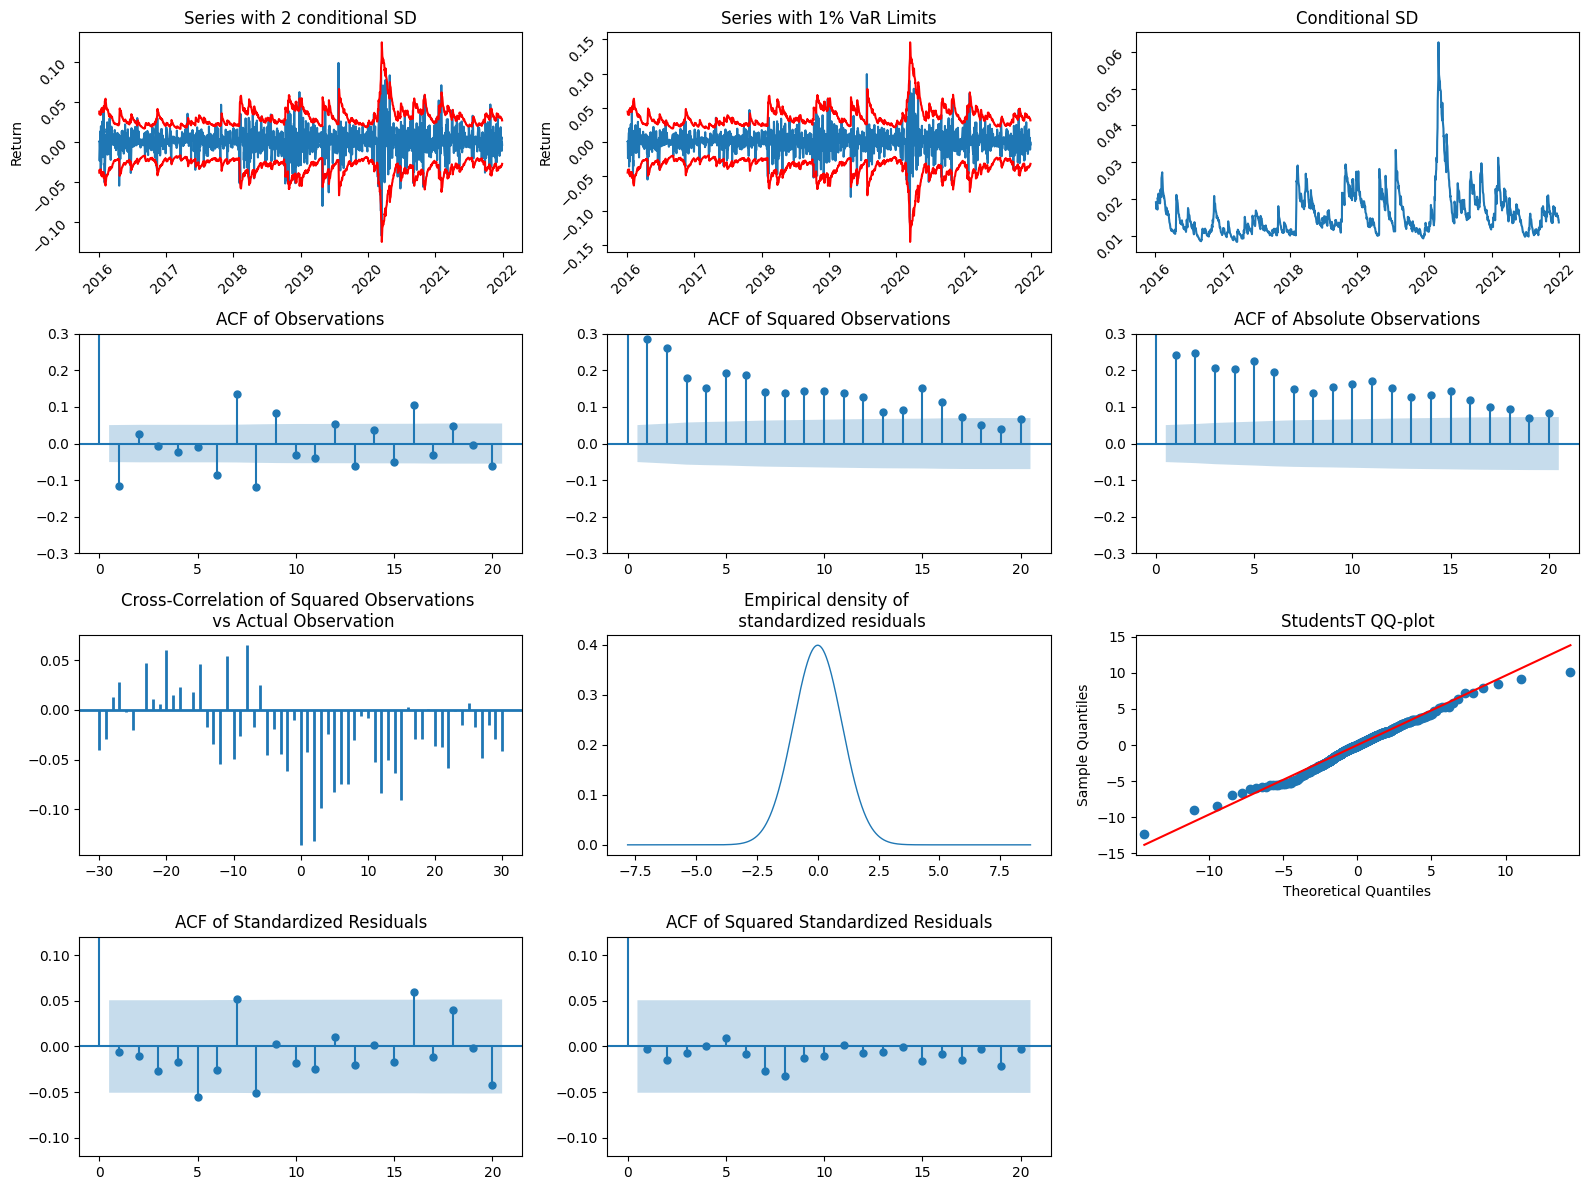

In [13]:
# Model Diagnostic Plots for the GARCH(1,1) Model with Student's t White Noise
fig, ax = plt.subplots(4, 3, figsize=(16, 12))

# Figure Row 1 Column 1
ax[0, 0].plot(goog.GOOGLE_R)
ax[0, 0].plot(2.0 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].plot(-2.0 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("Series with 2 conditional SD")
ax[0, 0].set_ylabel("Return")

# Figure Row 1 Column 2
VaR_1 = stats.t(df=len(goog.GOOGLE_R) - 1).ppf(0.99)
# VaR_1 = stats.norm.ppf(0.99)
ax[0, 1].plot(goog.GOOGLE_R)
ax[0, 1].plot(VaR_1 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].plot(-VaR_1 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("Series with 1% VaR Limits")
ax[0, 1].set_ylabel("Return")

# Figure Row 1 Column 3
ax[0, 2].plot(garch11_t_fit.conditional_volatility / 100.0)
ax[0, 2].set_title("Conditional SD")
ax[0, 2].tick_params(labelrotation=45)

# Figure Row 2 Column 1
sm.graphics.tsa.plot_acf(garch11_t_fit.resid / 100.0, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("ACF of Observations")
ax[1, 0].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 2
sm.graphics.tsa.plot_acf(garch11_t_fit.resid**2, lags=20, ax=ax[1, 1])
ax[1, 1].set_title("ACF of Squared Observations")
ax[1, 1].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 3
sm.graphics.tsa.plot_acf(np.abs(garch11_t_fit.resid), lags=20, ax=ax[1, 2])
ax[1, 2].set_title("ACF of Absolute Observations")
ax[1, 2].set_ylim([-0.3, 0.3])

# Figure Row 3 Column 1
ax[2, 0].xcorr(
    garch11_t_fit.resid**2,
    garch11_t_fit.resid,
    usevlines=True,
    maxlags=30,
    normed=True,
    lw=2,
)
ax[2, 0].set_title("Cross-Correlation of Squared Observations \n vs Actual Observation")

# Figure Row 3 Column 2
standaraized_residuals = garch11_t_fit.std_resid
min_val = np.min(standaraized_residuals)
max_val = np.max(standaraized_residuals)
empirical_density = np.linspace(min_val, max_val, len(standaraized_residuals))
ax[2, 1].plot(empirical_density, stats.norm.pdf(empirical_density), lw=1)
ax[2, 1].set_title("Empirical density of \n standardized residuals")

# Figure Row 3 Column 3
sm.qqplot(garch11_t_fit.resid, stats.t, fit=True, line="q", ax=ax[2, 2])
ax[2, 2].set_title("StudentsT QQ-plot")

# Figure Row 4 Column 1
sm.graphics.tsa.plot_acf(garch11_t_fit.std_resid, lags=20, ax=ax[3, 0])
ax[3, 0].set_title("ACF of Standardized Residuals")
ax[3, 0].set_ylim([-0.12, 0.12])

# Figure Row 4 Column 2
sm.graphics.tsa.plot_acf((garch11_t_fit.std_resid) ** 2, lags=20, ax=ax[3, 1])
ax[3, 1].set_title("ACF of Squared Standardized Residuals")
ax[3, 1].set_ylim([-0.12, 0.12])

ax[3, 2].axis("off")
fig.tight_layout()
plt.show()

From figure 9, we can see the StudentsT QQ plot shows the model is a good fit. Hence, GARCH(1,1) with Student's t white noise fits the model pretty well.


### **3.3 Model Forecast**

**Figure 10: 20 Steps Ahead Forecast for GARCH(1,1) Model with Student's t White Noise**


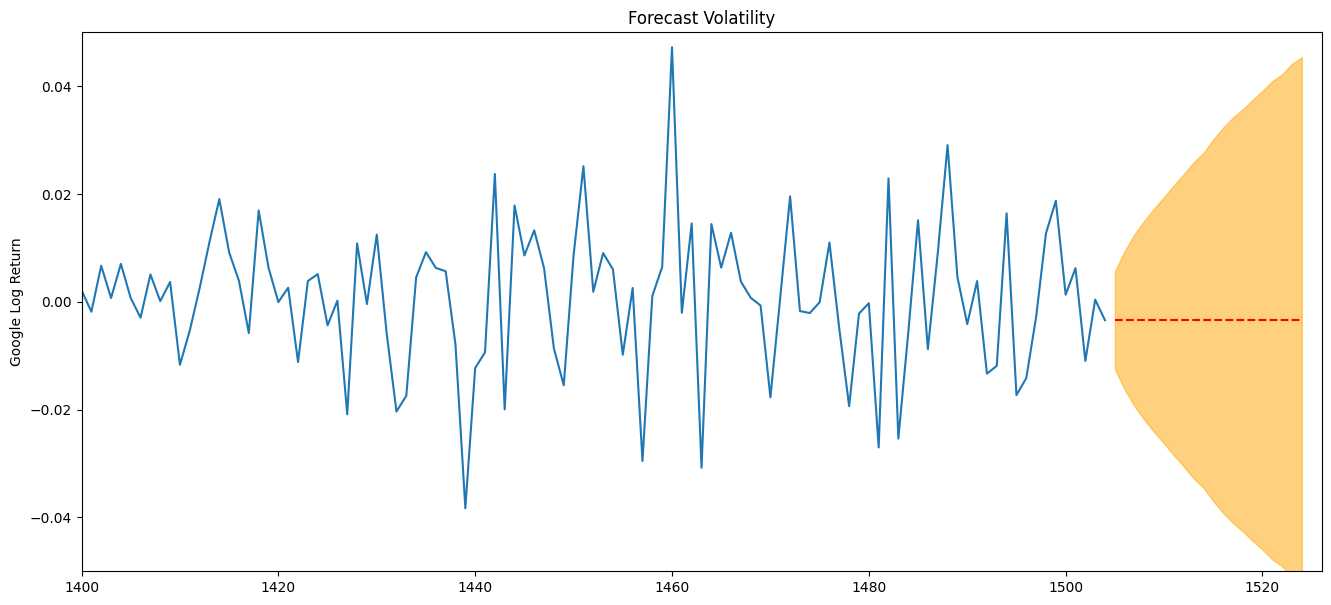

In [14]:
# 20 Steps Ahead Forecast for GARCH(1,1) Model with Student's t White Noise

# set horizon and forecast
horizon = 20
garch_forecast = garch11_t_fit.forecast(
    reindex=False, horizon=horizon, method="simulation"
)

# reindex data
googr = goog.GOOGLE_R.copy()
googr.index = list(range(len(goog_r) + 1))

# forecast mean
forc_mean = pd.Series(garch_forecast.mean.dropna().squeeze())
forc_mean.index = list(range(len(googr), len(googr) + horizon))

# volatility forecast
variance_fct = pd.DataFrame(data={"Forecast": garch_forecast.variance.values[0]})
variance_fct.index = list(range(len(googr), len(googr) + horizon))
std_fct = [np.sqrt(variance_fct.values[i] * (i + 1)) for i in range(len(variance_fct))]
volatility_fct = pd.DataFrame(std_fct)

# upper/lower bands
upper_band = googr.values[-1] * (1.0 + 2 * volatility_fct)
upper_band.index = variance_fct.index
lower_band = googr.values[-1] * (1.0 - 2 * volatility_fct)
lower_band.index = variance_fct.index

# Plot
plt.figure(figsize=(16, 7))
plt.xlim(1400, len(googr) + 21)
plt.ylim(-0.05, 0.05)
googr.plot(ylabel="Google Log Return", title="Forecast Volatility")
plt.plot((upper_band + lower_band) / 2, "r--")
plt.fill_between(
    upper_band.index.tolist(),
    upper_band.values.T[0],
    lower_band.values.T[0],
    color="orange",
    alpha=0.5,
)
plt.show()

In figure 10, we plot the 20 steps ahead forecast for Google stock return data based on the GARCH(1,1) with Student's t white noise. As the forecast goes farther out, we can see that the 1-sigma bands get wider.


## **4. Conclusion**

In this lesson, we introduced the GARCH model. We first gave the definition of GARCH(1,1) model. We then went through the properties of the GARCH(1,1) model. We also briefly expanded the GARCH model to a higher order GARCH($p,q$) model. Next, we talked about estimation of the GARCH model and the tests for model diagnostics. We finished the lesson with a GARCH application to Google stock returns. In the next lesson, we will go over some details about estimation methods for the GARCH model.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
